#First tut

In [2]:
import torch

In [3]:
x=torch.empty(2,3)
x

tensor([[-3.0595e-17,  4.4736e-41, -3.0596e-17],
        [ 4.4736e-41, -3.0684e-17,  4.4736e-41]])

In [4]:
x=torch.rand(2,2)
print(x)

tensor([[0.5994, 0.0820],
        [0.2763, 0.3542]])


In [5]:
x=torch.zeros(2,2)
print(x)

tensor([[0., 0.],
        [0., 0.]])


In [6]:
x=torch.ones(2,2)
print(x)

tensor([[1., 1.],
        [1., 1.]])


In [7]:
x=torch.ones(2,2,dtype=torch.float16)
print(x.size())

torch.Size([2, 2])


In [8]:
x=torch.tensor([2.5,0.1])
print(x)

tensor([2.5000, 0.1000])


In [9]:
x=torch.rand(2,2)
y=torch.rand(2,2)
print(x)
print(y)
z=x*y
z=torch.add(x,y)
print(z)

tensor([[0.4064, 0.3744],
        [0.0338, 0.4242]])
tensor([[0.9030, 0.7314],
        [0.2148, 0.5032]])
tensor([[1.3094, 1.1057],
        [0.2486, 0.9274]])


In [10]:
y.add_(x)
print(y)#inplace

tensor([[1.3094, 1.1057],
        [0.2486, 0.9274]])


In [11]:
z=x-y
z=torch.sub(x,y)
print(z)

tensor([[-0.9030, -0.7314],
        [-0.2148, -0.5032]])


In [12]:
z=x-y
z=torch.mul(x,y)#elementwise multiplication
print(z)

tensor([[0.5322, 0.4140],
        [0.0084, 0.3934]])


In [14]:
z=torch.div(x,y)#elementwise
print(z)

tensor([[0.3104, 0.3386],
        [0.1359, 0.4574]])


In [20]:
x=torch.rand(5,3)
print(x)
print(x[:,0])
print(x[1,1])
print(x[1,1].item())

tensor([[0.8937, 0.8367, 0.5882],
        [0.1751, 0.4855, 0.2875],
        [0.5273, 0.1506, 0.6809],
        [0.6013, 0.7376, 0.5326],
        [0.6135, 0.0779, 0.3270]])
tensor([0.8937, 0.1751, 0.5273, 0.6013, 0.6135])
tensor(0.4855)
0.48547083139419556


In [22]:
x=torch.rand(4,4)
print(x)
y=x.view(16)
print(y)
y=x.view(-1,8)#-1 automatic
print(y)

tensor([[0.0116, 0.2980, 0.4711, 0.3724],
        [0.7760, 0.7229, 0.7473, 0.7523],
        [0.4717, 0.1165, 0.1535, 0.8783],
        [0.0966, 0.1323, 0.8184, 0.9492]])
tensor([0.0116, 0.2980, 0.4711, 0.3724, 0.7760, 0.7229, 0.7473, 0.7523, 0.4717,
        0.1165, 0.1535, 0.8783, 0.0966, 0.1323, 0.8184, 0.9492])
tensor([[0.0116, 0.2980, 0.4711, 0.3724, 0.7760, 0.7229, 0.7473, 0.7523],
        [0.4717, 0.1165, 0.1535, 0.8783, 0.0966, 0.1323, 0.8184, 0.9492]])


In [23]:
import torch
import numpy as np


In [25]:
a=torch.ones(5)
print(a)
b=a.numpy()
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [26]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [31]:
a=np.ones(5)
print(a)
b=torch.from_numpy(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [32]:
a+=1
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [3]:
if torch.cuda.is_available():
  device=torch.device("cuda")
  x=torch.ones(5,device=device)
  y=torch.ones(5)
  y=y.to(device)
  z=x+y
  # print(z)
  z=z.to("cpu")
  print(z)

tensor([2., 2., 2., 2., 2.])


In [37]:
torch.cuda.is_available()

False

In [38]:
x=torch.ones(5,requires_grad=True)
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


# Second Tut

In [12]:
import torch
x=torch.randn(3,requires_grad=True)
print(x)


tensor([-0.1933,  0.2070,  0.2451], requires_grad=True)


In [19]:
y=x+2
print(y)
z=y*y*2
print(z)
z=z.mean()
print(z)
z.backward() #dz/dx
print(x.grad)

tensor([1.8067, 2.2070, 2.2451], grad_fn=<AddBackward0>)
tensor([ 6.5284,  9.7418, 10.0812], grad_fn=<MulBackward0>)
tensor(8.7838, grad_fn=<MeanBackward0>)
tensor([ 7.9495, 17.6561,  9.0703])


In [20]:
z=y*y*2
v=torch.tensor([0.1,1.0,0.01],dtype=torch.float32)
z.backward(v)
print(x.grad)

tensor([ 8.6722, 26.4842,  9.1601])


In [22]:
x.requires_grad_(False)
print(x)

tensor([-0.1933,  0.2070,  0.2451])


In [23]:
y=x.detach()
print(y)

tensor([-0.1933,  0.2070,  0.2451])


In [24]:
with torch.no_grad():
  y=x+2
  print(y)

tensor([1.8067, 2.2070, 2.2451])


In [28]:
weights=torch.ones(4,requires_grad=True)

for epoch in range(3):
  model_output=(weights*3).sum()
  model_output.backward()

  print(weights.grad)
  # weights.grad.zero_()


tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


# Backpropagation Theory

In [36]:
import torch
x=torch.tensor(1.0)
y=torch.tensor(2.0)

w=torch.tensor(1.0,requires_grad=True)

y_hat=w*x
loss=(y_hat-y)**2
print(loss)
loss.backward()
print(w.grad)
#backward pass above
#update weights
#next forward and backward pass

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


#Gradientg Descent with AutoGrad and Bakckprop

In [45]:
import numpy as np

#f=w*x
#f=2*x

X=np.array([1,2,3,4],dtype=np.float32)
Y=np.array([2,4,6,8],dtype=np.float32)

w=0.0

#model prediction
def forward(x):
  return w * x

# loss - MSE

def loss(y,y_predicted):
  return ((y_predicted-y)**2).mean()

# gradient
#MSE =1/N *(w*x-y)**2
#dj/dx=1/N 2x(w*x-y)

def gradient(x,y,y_predicted):
  return np.dot(2*x,y_predicted-y).mean()


print("Predictions before training:" +str(forward(5)))

#Training
learning_rate=0.01
n_iters=10

for epoch in range(n_iters):
  #predictions=forward pass
  y_pred=forward(X)

  #loss
  l=loss(Y,y_pred)

  #gradients
  dw=gradient(X,Y,y_pred)

  #update weights
  w-=learning_rate*dw
  if epoch%2 ==0:
    print(f'epoch {epoch+1}: w={w:.3f}, loss={l:.8f}')

print("Predictions after training:" +str(forward(5)))


Predictions before training:0.0
epoch 1: w=1.200, loss=30.00000000
epoch 3: w=1.872, loss=0.76800019
epoch 5: w=1.980, loss=0.01966083
epoch 7: w=1.997, loss=0.00050332
epoch 9: w=1.999, loss=0.00001288
Predictions after training:9.998952


In [50]:
import torch
#f=w*x
#f=2*x

X=torch.tensor([1,2,3,4],dtype=torch.float32)
Y=torch.tensor([2,4,6,8],dtype=torch.float32)

w=torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

#model prediction
def forward(x):
  return w * x

# loss - MSE

def loss(y,y_predicted):
  return ((y_predicted-y)**2).mean()

# gradient
#MSE =1/N *(w*x-y)**2
#dj/dx=1/N 2x(w*x-y)

def gradient(x,y,y_predicted):
  return np.dot(2*x,y_predicted-y).mean()


print("Predictions before training:" +str(forward(5)))

#Training
learning_rate=0.01
n_iters=100

for epoch in range(n_iters):
  #predictions=forward pass
  y_pred=forward(X)

  #loss
  l=loss(Y,y_pred)

  #gradients
  l.backward()

  #update weights
  with torch.no_grad():
    w-=learning_rate*w.grad
  w.grad.zero_()
  if epoch%10 ==0:
    print(f'epoch {epoch+1}: w={w:.3f}, loss={l:.8f}')

print("Predictions after training:" +str(forward(5)))


Predictions before training:tensor(0., grad_fn=<MulBackward0>)
epoch 1: w=0.300, loss=30.00000000
epoch 11: w=1.665, loss=1.16278565
epoch 21: w=1.934, loss=0.04506890
epoch 31: w=1.987, loss=0.00174685
epoch 41: w=1.997, loss=0.00006770
epoch 51: w=1.999, loss=0.00000262
epoch 61: w=2.000, loss=0.00000010
epoch 71: w=2.000, loss=0.00000000
epoch 81: w=2.000, loss=0.00000000
epoch 91: w=2.000, loss=0.00000000
Predictions after training:tensor(10.0000, grad_fn=<MulBackward0>)


#Pytorch Loss and Optimizer

In [51]:
#1 Design model,input and output size ,forward pass
#2 Construct loss and optimizer
#3 Training oss
# - forwards pass: compute Prediction
# - backward pass: gradients
# - update weights


import torch
import torch.nn as nn
#f=w*x
#f=2*x

X=torch.tensor([1,2,3,4],dtype=torch.float32)
Y=torch.tensor([2,4,6,8],dtype=torch.float32)

w=torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

#model prediction
def forward(x):
  return w * x

# loss - MSE



# gradient
#MSE =1/N *(w*x-y)**2
#dj/dx=1/N 2x(w*x-y)

def gradient(x,y,y_predicted):
  return np.dot(2*x,y_predicted-y).mean()


print("Predictions before training:" +str(forward(5)))

#Training
learning_rate=0.01
n_iters=100

losee=nn.MSELoss()
optimizer=torch.optim.SGD([w],lr=learning_rate)

for epoch in range(n_iters):
  #predictions=forward pass
  y_pred=forward(X)

  #loss
  l=loss(Y,y_pred)

  #gradients
  l.backward()

  #update weights
  optimizer.step()
  optimizer.zero_grad()

  if epoch%10 ==0:
    print(f'epoch {epoch+1}: w={w:.3f}, loss={l:.8f}')

print("Predictions after training:" +str(forward(5)))


Predictions before training:tensor(0., grad_fn=<MulBackward0>)
epoch 1: w=0.300, loss=30.00000000
epoch 11: w=1.665, loss=1.16278565
epoch 21: w=1.934, loss=0.04506890
epoch 31: w=1.987, loss=0.00174685
epoch 41: w=1.997, loss=0.00006770
epoch 51: w=1.999, loss=0.00000262
epoch 61: w=2.000, loss=0.00000010
epoch 71: w=2.000, loss=0.00000000
epoch 81: w=2.000, loss=0.00000000
epoch 91: w=2.000, loss=0.00000000
Predictions after training:tensor(10.0000, grad_fn=<MulBackward0>)


In [56]:
#1 Design model,input and output size ,forward pass
#2 Construct loss and optimizer
#3 Training oss
# - forwards pass: compute Prediction
# - backward pass: gradients
# - update weights


import torch
import torch.nn as nn
#f=w*x
#f=2*x

X=torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
Y=torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)

X_test=torch.tensor([5],dtype=torch.float32)

n_samples,n_features=X.shape
print(n_samples,n_features)
input_size=n_features
output_size=n_features

#model=nn.Linear(input_size,output_size)
model=nn.Linear(input_size,output_size)


print("Predictions before training:" +str(model(X_test).item()))

#Training
learning_rate=0.01
n_iters=100

losee=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

for epoch in range(n_iters):
  #predictions=forward pass
  y_pred=model(X)

  #loss
  l=loss(Y,y_pred)

  #gradients
  l.backward()

  #update weights
  optimizer.step()
  optimizer.zero_grad()

  if epoch%10 ==0:
    [w,b]=model.parameters()
    print(f'epoch {epoch+1}: w={w[0][0].item():.3f}, loss={l:.8f}')

print("Predictions after training:" +str(model(X_test).item()))


4 1
Predictions before training:4.347386360168457
epoch 1: w=0.837, loss=7.76073170
epoch 11: w=1.477, loss=0.43018377
epoch 21: w=1.590, loss=0.22717299
epoch 31: w=1.617, loss=0.20934579
epoch 41: w=1.631, loss=0.19704153
epoch 51: w=1.642, loss=0.18556964
epoch 61: w=1.653, loss=0.17476842
epoch 71: w=1.663, loss=0.16459602
epoch 81: w=1.673, loss=0.15501556
epoch 91: w=1.683, loss=0.14599292
Predictions after training:9.364309310913086


In [60]:
#1 Design model,input and output size ,forward pass
#2 Construct loss and optimizer
#3 Training oss
# - forwards pass: compute Prediction
# - backward pass: gradients
# - update weights


import torch
import torch.nn as nn
#f=w*x
#f=2*x

X=torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
Y=torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)

X_test=torch.tensor([5],dtype=torch.float32)

n_samples,n_features=X.shape
print(n_samples,n_features)
input_size=n_features
output_size=n_features

#model=nn.Linear(input_size,output_size)
# model=nn.Linear(input_size,output_size)


# 1 Design model, input and output size, forward pass
class LinearRegression(nn.Module):

  def __init__(self, input_dim, output_dim):  # Corrected: __init__ not _init_
    super(LinearRegression, self).__init__()
    # define layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)


model = LinearRegression(input_size, output_size)


print("Predictions before training:" +str(model(X_test).item()))

#Training
learning_rate=0.01
n_iters=100

losee=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

for epoch in range(n_iters):
  #predictions=forward pass
  y_pred=model(X)

  #loss
  l=loss(Y,y_pred)

  #gradients
  l.backward()

  #update weights
  optimizer.step()
  optimizer.zero_grad()

  if epoch%10 ==0:
    [w,b]=model.parameters()
    print(f'epoch {epoch+1}: w={w[0][0].item():.3f}, loss={l:.8f}')

print("Predictions after training:" +str(model(X_test).item()))


4 1
Predictions before training:3.870293140411377
epoch 1: w=0.986, loss=11.59272003
epoch 11: w=1.768, loss=0.30952698
epoch 21: w=1.896, loss=0.01704516
epoch 31: w=1.919, loss=0.00895203
epoch 41: w=1.924, loss=0.00824726
epoch 51: w=1.927, loss=0.00776249
epoch 61: w=1.929, loss=0.00731054
epoch 71: w=1.931, loss=0.00688503
epoch 81: w=1.933, loss=0.00648428
epoch 91: w=1.935, loss=0.00610685
Predictions after training:9.869986534118652


#Linear Regression using Pytorch

epoch 1: w=1.561, loss=5704.9985
epoch 11: w=13.467, loss=4226.7202
epoch 21: w=23.612, loss=3157.8440
epoch 31: w=32.257, loss=2384.1265
epoch 41: w=39.626, loss=1823.4814
epoch 51: w=45.909, loss=1416.8419
epoch 61: w=51.266, loss=1121.6422
epoch 71: w=55.835, loss=907.1669
epoch 81: w=59.732, loss=751.2246
epoch 91: w=63.057, loss=637.7620


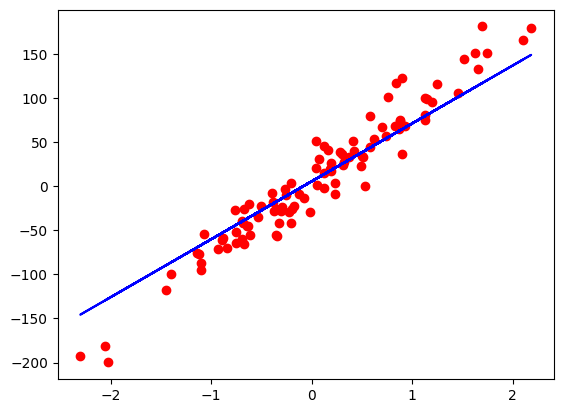

In [61]:
#1 Design (input size,output size,forward pass)
#2 Construct loss and optimizer
#3 Training Loop
    # -forward pass: compute predictions and loss
    # -backward pass: gradients
    # -update weights
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

x_numpy,y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)
X=torch.from_numpy(x_numpy.astype(np.float32))
Y=torch.from_numpy(y_numpy.astype(np.float32))
Y=Y.view(Y.shape[0],1)
n_samples,n_features=X.shape
#Model
input_size=n_features
output_size=1
model=nn.Linear(input_size,output_size)
criteria=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

#Training
num_epochs=100
for epoch in range(num_epochs):
  #forward pass and loss
  y_predicted=model(X)
  loss=criteria(y_predicted,Y)
  #backward pass
  loss.backward()
  #update
  optimizer.step()
  #empty gradients
  optimizer.zero_grad()

  if epoch%10==0:
    [w,b]=model.parameters()
    print(f'epoch {epoch+1}: w={w[0][0].item():.3f}, loss={loss:.4f}')

 #plot
predicted=model(X).detach().numpy()
plt.plot(x_numpy,y_numpy,'ro')
plt.plot(x_numpy,predicted,'b')
plt.show()




#Logistic Regression using Pytorch

In [64]:
#1 Design (input size,output size,forward pass)
#2 Construct loss and optimizer
#3 Training Loop
    # -forward pass: compute predictions and loss
    # -backward pass: gradients
    # -update weights
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

bc=datasets.load_breast_cancer()
X,y=bc.data,bc.target

n_samples,n_features=X.shape
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train=torch.from_numpy(X_train.astype(np.float32))
X_test=torch.from_numpy(X_test.astype(np.float32))
y_train=torch.from_numpy(y_train.astype(np.float32))
y_test=torch.from_numpy(y_test.astype(np.float32))
y_train=y_train.view(y_train.shape[0],1)
y_test=y_test.view(y_test.shape[0],1)

#f=wx+b,sigmoid at the end
class LogisticRegression(nn.Module):
  def __init__(self,n_input_features):
    super(LogisticRegression,self).__init__()
    self.linear=nn.Linear(n_input_features,1)

  def forward(self,x):
    y_predicted=torch.sigmoid(self.linear(x))
    return y_predicted

#Model
model=LogisticRegression(n_features)
#Loss and Optimizer
criteria=nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

#Training
num_epochs=100
for epoch in range(num_epochs):
  #forward pass and loss
  y_predicted=model(X_train)
  loss=criteria(y_predicted,y_train)
  #backward pass
  loss.backward()
  #update
  optimizer.step()
  #empty gradients
  optimizer.zero_grad()

  if (epoch+1)%10==0:
    [w,b]=model.parameters()
    print(f'epoch {epoch+1}: loss={loss:.4f}')

with torch.no_grad():
  y_predicted=model(X_test)
  y_predicted_cls=y_predicted.round()
  acc=y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0])
  print(f'accuracy={acc:.4f}')




epoch 10: loss=0.4731
epoch 20: loss=0.4075
epoch 30: loss=0.3618
epoch 40: loss=0.3282
epoch 50: loss=0.3022
epoch 60: loss=0.2815
epoch 70: loss=0.2646
epoch 80: loss=0.2504
epoch 90: loss=0.2383
epoch 100: loss=0.2278
accuracy=0.9211


#Dataset and DataLoader

In [76]:
'''
epoch = 1 forward and backward pass of ALL training samples
batch_size= number of training sample in one forward and backward pass
number of iterations = number of passes,each pass using[batch_size] number of samples
e.g 100 samples,batch_size=20 -->100/20=5 iterations for 1 epoch
'''

import torch
import torchvision
from torch.utils.data import Dataset,DataLoader
import numpy as np
import math

class WineDataset(Dataset):
  def __init__(self):
    #data loading
    xy= np.loadtxt('/content/WineQT.csv',delimiter=",",dtype=np.float32,skiprows=1)
    self.x=torch.from_numpy(xy[:,1:])
    self.y=torch.from_numpy(xy[:,[0]])
    self.n_samples=xy.shape[0]

  def __getitem__(self,index):
    return self.x[index],self.y[index]

  def __len__(self):
    return self.n_samples


dataset = WineDataset()
# first_data = dataset[0]
# features,labels = first_data
# print(features,labels)

dataloader=DataLoader(dataset=dataset,batch_size=4,shuffle=True,num_workers=2)
datatiter=iter(dataloader)
data=next(datatiter)
features,labels=data
print(features,labels)


#training loop
num_epochs=2
total_samples=len(dataset)
n_iterations=math.ceil(total_samples/4)
print(total_samples,n_iterations)
for epoch in range(num_epochs):
  for i,(inputs,labels) in enumerate(dataloader):
     # forward and backward,update (placeholders for actual model logic)

     # --- ADDED CONDITION HERE TO MATCH VIDEO'S PRINT FREQUENCY ---
     if (i + 1) % 5 == 0: # Print every 5th step
       print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs shape: {inputs.shape}')

print("\nTraining loop simulation complete.")

# torchvision.datasets.MNIST()
#fashion=mnist,tifar,coco


tensor([[5.9000e-01, 1.4000e-01, 2.0000e+00, 8.4000e-02, 2.5000e+01, 4.8000e+01,
         9.9810e-01, 3.1400e+00, 5.6000e-01, 9.7000e+00, 5.0000e+00, 6.6500e+02],
        [5.3000e-01, 1.4000e-01, 2.1000e+00, 6.4000e-02, 1.5000e+01, 2.9000e+01,
         9.9323e-01, 3.3500e+00, 6.1000e-01, 1.2100e+01, 6.0000e+00, 1.2970e+03],
        [6.4000e-01, 9.0000e-02, 2.5000e+00, 8.1000e-02, 1.5000e+01, 2.6000e+01,
         9.9538e-01, 3.5700e+00, 6.3000e-01, 1.2000e+01, 5.0000e+00, 1.5380e+03],
        [4.7000e-01, 4.3000e-01, 2.1000e+00, 1.7100e-01, 2.7000e+01, 6.6000e+01,
         9.9820e-01, 3.1700e+00, 7.6000e-01, 1.0800e+01, 6.0000e+00, 1.1090e+03]]) tensor([[ 9.4000],
        [ 7.2000],
        [ 6.2000],
        [10.8000]])
1143 286
epoch 1/2, step 5/286, inputs shape: torch.Size([4, 12])
epoch 1/2, step 10/286, inputs shape: torch.Size([4, 12])
epoch 1/2, step 15/286, inputs shape: torch.Size([4, 12])
epoch 1/2, step 20/286, inputs shape: torch.Size([4, 12])
epoch 1/2, step 25/286, inputs

#DataSet Transforms

In [78]:
import torch
import torchvision

# dataset=torchvision.datasets.MNIST(
#     root='./data',transform=torchvision.transforms.ToTensor()
# )

'''
Transforms can be applied to PIL images,tensors,ndarrays or custom data
during creation of the Dataset


On Images:CeterCrop,Grayscale,Pad,RandomAffine,RandomCrop,RandomHorizontalFlip
,RandomRotation,Resize,Scale

On Tensors
LinearTransformation,Normalize,RandomErasing

Conversion
TopIImage: from tensor or ndarray
ToTensor: from numpy.ndarray or PILImage

Generic
Write own class

Compose Multiple Transform
composed=transform.Compose([Rescale[256],RandomCrop(224)])
torchvision.transform.ReScale(256)
torchvision.transform.ToTensor()
'''


'''
epoch = 1 forward and backward pass of ALL training samples
batch_size= number of training sample in one forward and backward pass
number of iterations = number of passes,each pass using[batch_size] number of samples
e.g 100 samples,batch_size=20 -->100/20=5 iterations for 1 epoch
'''

import torch
import torchvision
from torch.utils.data import Dataset,DataLoader
import numpy as np
import math

class WineDataset(Dataset):
  def __init__(self,transform=None):
    #data loading
    xy= np.loadtxt('/content/WineQT.csv',delimiter=",",dtype=np.float32,skiprows=1)
    self.x=torch.from_numpy(xy[:,1:])
    self.y=torch.from_numpy(xy[:,[0]])
    self.n_samples=xy.shape[0]

  def __getitem__(self,index):
    sample= self.x[index],self.y[index]

    if self.transform:
      sample=self.transform(sample)

    return sample

  def __len__(self):
    return self.n_samples


class ToTensor:
  def __call__(self,sample):
    inputs,targets=sample
    return torch.from_numpy(inputs),torch.from_numpy(targets)

class MulTransform:
  def __init__(self,factor):
    self.factor=factor

  def __call__(self,sample):
    inputs,targets=sample
    inputs*=self.factor
    return inputs,targets


dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features,labels = first_data
print(type(features),type(labels))

composed=torchvision.transforms.Compose([ToTensor(),MulTransform(4)])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features,labels = first_data
print(type(features),type(labels))

#

# dataloader=DataLoader(dataset=dataset,batch_size=4,shuffle=True,num_workers=2)
# datatiter=iter(dataloader)
# data=next(datatiter)
# features,labels=data
# print(features,labels)


# #training loop
# num_epochs=2
# total_samples=len(dataset)
# n_iterations=math.ceil(total_samples/4)
# print(total_samples,n_iterations)
# for epoch in range(num_epochs):
#   for i,(inputs,labels) in enumerate(dataloader):
#      # forward and backward,update (placeholders for actual model logic)

#      # --- ADDED CONDITION HERE TO MATCH VIDEO'S PRINT FREQUENCY ---
#      if (i + 1) % 5 == 0: # Print every 5th step
#        print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs shape: {inputs.shape}')

print("\nTraining loop simulation complete.")

# torchvision.datasets.MNIST()
#fashion=mnist,tifar,coco



AttributeError: 'WineDataset' object has no attribute 'transform'

In [79]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
  def __init__(self, transform=None):
    xy = np.loadtxt('/content/WineQT.csv', delimiter=",", dtype=np.float32, skiprows=1)
    self.x = xy[:, 1:]
    self.y = xy[:, [0]]
    self.n_samples = xy.shape[0]
    self.transform = transform

  def __getitem__(self, index):
    inputs = self.x[index]
    targets = self.y[index]

    sample = {'inputs': inputs, 'targets': targets}

    if self.transform:
      sample = self.transform(sample)

    return sample['inputs'], sample['targets']

  def __len__(self):
    return self.n_samples

class ToTensor:
  def __call__(self, sample):
    inputs, targets = sample['inputs'], sample['targets']
    return {'inputs': torch.from_numpy(inputs),
            'targets': torch.from_numpy(targets)}

class MulTransform:
  def __init__(self, factor):
    self.factor = factor

  def __call__(self, sample):
    sample['inputs'] = sample['inputs'] * self.factor
    return sample

dataset_with_to_tensor = WineDataset(transform=ToTensor())
first_data_to_tensor = dataset_with_to_tensor[0]
features_to_tensor, labels_to_tensor = first_data_to_tensor
print(f"Features type after ToTensor: {type(features_to_tensor)}")
print(f"Labels type after ToTensor: {type(labels_to_tensor)}")
print(f"Features value (first sample):\n{features_to_tensor}")
print(f"Labels value (first sample):\n{labels_to_tensor}")

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(4)])
dataset_with_composed = WineDataset(transform=composed)
first_data_composed = dataset_with_composed[0]
features_composed, labels_composed = first_data_composed
print(f"\nFeatures type after Composed: {type(features_composed)}")
print(f"Labels type after Composed: {type(labels_composed)}")
print(f"Features value (first sample, multiplied by 4):\n{features_composed}")
print(f"Labels value (first sample, unchanged):\n{labels_composed}")

print("\nTraining loop simulation complete.")

Features type after ToTensor: <class 'torch.Tensor'>
Labels type after ToTensor: <class 'torch.Tensor'>
Features value (first sample):
tensor([ 0.7000,  0.0000,  1.9000,  0.0760, 11.0000, 34.0000,  0.9978,  3.5100,
         0.5600,  9.4000,  5.0000,  0.0000])
Labels value (first sample):
tensor([7.4000])

Features type after Composed: <class 'torch.Tensor'>
Labels type after Composed: <class 'torch.Tensor'>
Features value (first sample, multiplied by 4):
tensor([  2.8000,   0.0000,   7.6000,   0.3040,  44.0000, 136.0000,   3.9912,
         14.0400,   2.2400,  37.6000,  20.0000,   0.0000])
Labels value (first sample, unchanged):
tensor([7.4000])

Training loop simulation complete.


# Softmax and Cross - Entropy